# Finding The Best Markets To Advertise In

For this project we will take the role of a data analyst who works for an e-learning company.  While the company focuses on courses in web and mobile development, it also offers programs in data science and game development.  The company wants to invest in advertisement and wants to know what the two best markets are to invest in.

To gain insight into who is learning to code, we will  we will examine the results of a survey released by freeCodeCamp.  The survey received 31,000 repsonses to over 50 questions. 

You can read more about the survey [here](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) and more about the data on their [github repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

Examining this survey is a good first step since organizing our own survey would be costly and time consuming.  

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid truncated output
pd.options.display.max_columns = 150

# Read in the data
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

## Explore The Data

In [2]:
survey.shape

(18175, 136)

In [3]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [4]:
survey.columns.values

array(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls',
       'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev',
       'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool',
       'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge',
       'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen',
       'CountryLive', 'EmploymentField', 'EmploymentFieldOther',
       'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning',
       'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther',
       'HasChildren', 'HasDebt', 'HasFinancialDependents',
       'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary',
       'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x',
       'ID.y',

In [5]:
survey['JobRoleInterest']

0                                                      NaN
1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
                               ...                        
18170                                                  NaN
18171      DevOps / SysAdmin,   Mobile Developer,   Pro...
18172                                                  NaN
18173                                                  NaN
18174    Back-End Web Developer, Data Engineer,   Data ...
Name: JobRoleInterest, Length: 18175, dtype: object

### Observations

There is alot of information in this data set but the information most pertinent to our analisys are the following columns:

- ```JobeRoleInterest``` - which field the respondant is interested in
- ```CountryLive``` - which country the respondant lives in
- ```MoneyForLearning``` - the amount of money (in US dollars) that the respondant has spent since they started coding until the present (when then completed this survey)
- ```MonthsProgramming``` - the number of months the responant has been coding.

## Determining If The Survey Is A Representative Sample

In order to determine if the survey is relevant for us we need to find out if any of the respondants are interested in the job fields where we offer courses.  

We will look at the ```JobRoleInterest``` column to determine this:

In [6]:
survey['JobRoleInterest'].value_counts(normalize=True, ascending=False)

Full-Stack Web Developer                                                                                                                                                                                      0.117706
  Front-End Web Developer                                                                                                                                                                                     0.064359
  Data Scientist                                                                                                                                                                                              0.021739
Back-End Web Developer                                                                                                                                                                                        0.020309
  Mobile Developer                                                                                                                          

### Observations 

It appears that Web Development and Data Science are among the most popular, however there are also many entries of multiple fields.

To extract the information we need we will split the strings so that we can determine:

1) if the respondant has one or multiple interests and 
<br>
2) if they are interested in the fields covered by our courses: 

## Interested in One or Mupltiple Areas of Study?

In [7]:
# Split each string in the 'JobRoleInterest' column
interests_split = survey['JobRoleInterest'].dropna()
interests_split = interests_split.str.split(',')

# Frequency table for the var describing the number of options
interests_count = interests_split.apply(lambda x: len(x)) # x is a list of job options
interests_count.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Text(0.5, 0.95, 'Number of Job Interests')

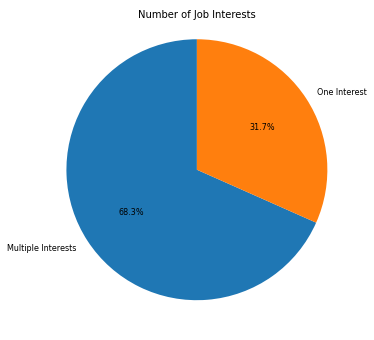

In [8]:
# Transform Data and Aggregate 
interests_split = pd.DataFrame(interests_split)
interests_split['multiple'] = interests_split['JobRoleInterest'].apply(
    lambda x: 'multiple' if len(x) >1 else 'one')
interests_split_gb = interests_split.groupby(['multiple']).count()
interests_split_gb

# Plot
fig, ax = plt.subplots(figsize=(6,6))

plt.pie(interests_split_gb['JobRoleInterest'], 
        labels=('Multiple Interests', 'One Interest'), 
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 8})

# Plot Aesthetics
plt.title('Number of Job Interests',
          fontsize=10,
          y=0.95)

### Observations
- Almost 70% of the respondants have more than one interest.
- Since our compnay offers courses across several disciplines, this isn't a disqualfying factor at all.  It may be a benefit since they could possible take multiple courses with us.  

## Are The Respondants Interested In The Courses We Offer?

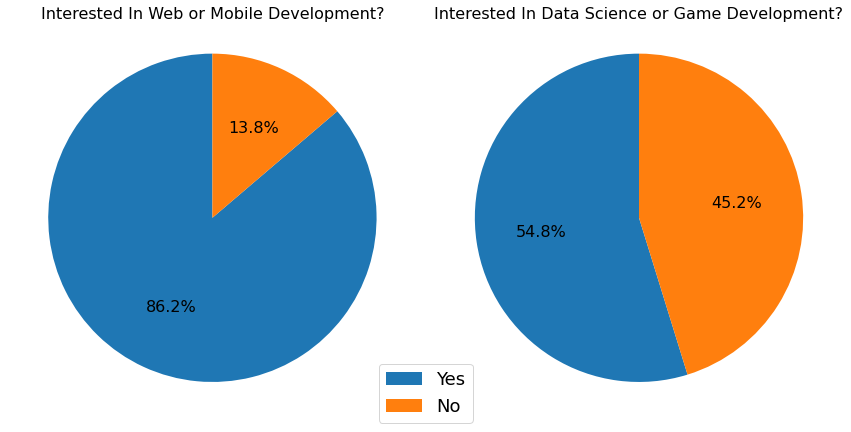

In [9]:
contains_web_mobile = survey['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')
contains_data_game = survey['JobRoleInterest'].str.contains('Data|Game')
# contains_web_moblie = contains_web_mobile.copy()
# contains_data_game = contains_data_game.copy()

# Plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

patches, texts, autotexts = ax1.pie(contains_web_mobile.value_counts(), 
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 16})

patches, texts, autotexts = ax2.pie(contains_data_game.value_counts(),
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 16})

# Plot Aesthetics
ax1.set_title('Interested In Web or Mobile Development?',
              y=0.97,
              fontsize=16)
ax2.set_title('Interested In Data Science or Game Development?',
              y=0.97,
              fontsize=16)
pielabels = ['Yes', 'No']
fig.legend(pielabels,
           loc='lower center',
           prop={'size': 18})
plt.tight_layout()

### Observations

- Over 85% of the respondants are intererested in the primary courses we offer (Web and Mobile Development).
- Over half of the respondants are interested in the secondary courses we offer (Data Science and Game Development).
- Based on this, we can be confident that the survey is a representative sample of our target population.

Next we need to determine where the respondants live and also if they are willing to spend enough money to enroll in our courses:

## Finding Locations To Advertise In

Next, we need to determine where our target market lives so we know where to deploy resourses.  We will use the ```CountryLive``` column.

We will use our above ```contains_web_mobile``` and ```contains_data_game``` series as boolean masks against the ```survey``` dataframe.  This will give us our entire target population of respondants who are interested in the subjects of the courses we offer. From there we can find the most common locations and choose among them.

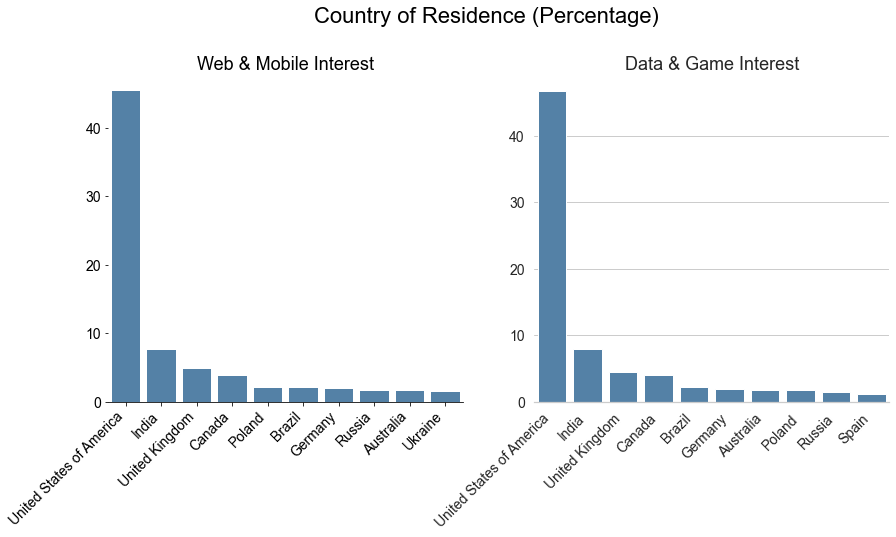

In [10]:
# Remove rows where they have NaN values in the ```JobRoleInterest``` column
# NaN values in this column mean they did answer that question
survey = survey[survey['JobRoleInterest'].notna()]

# Remove the same rows in our boolean masks series
contains_web_mobile = contains_web_mobile[contains_web_mobile.notna()]
contains_data_game = contains_data_game[contains_data_game.notna()]

# Apply the filters to get dataframes that hold respondants interested in our courses
survey_web_mobile = survey[contains_web_mobile].copy()
survey_data_game = survey[contains_data_game].copy()

# Plot
fix, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,6))
plt.rcParams['figure.dpi'] = 460
plt.suptitle('Country of Residence (Percentage)',
             fontsize=22,
             y=1.04)

ax1 = plt.subplot(1,2,1)
ax1 = sns.barplot(data = survey_web_mobile,
                  x = survey_web_mobile['CountryLive'].value_counts(normalize=True).index[:10],
                  y = survey_web_mobile['CountryLive'].value_counts(normalize=True)[:10] * 100,
                  color = 'steelblue')
ax1.set_title('Web & Mobile Interest', fontsize=18)
ax1.set_ylabel('')
ax1.tick_params(labelsize=14)
plt.xticks(rotation = 45, ha='right')
sns.despine(left=True)
sns.set(style='whitegrid')

ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(data = survey_data_game,
                  x = survey_data_game['CountryLive'].value_counts(normalize=True).index[:10],
                  y = survey_data_game['CountryLive'].value_counts(normalize=True)[:10] * 100,
                  color = 'steelblue')
ax2.set_title('Data & Game Interest', fontsize=18)
ax2.set_ylabel('')
ax2.tick_params(labelsize=14)
plt.xticks(rotation = 45, ha='right')
sns.despine(left=True)
sns.set(style='whitegrid')

In [11]:
survey_web_mobile['CountryLive'].value_counts()[:10]

United States of America    2676
India                        443
United Kingdom               281
Canada                       221
Poland                       121
Brazil                       115
Germany                      107
Russia                        93
Australia                     88
Ukraine                       86
Name: CountryLive, dtype: int64

In [12]:
survey_data_game['CountryLive'].value_counts()[:10]

United States of America    1444
India                        247
United Kingdom               137
Canada                       123
Brazil                        66
Germany                       60
Australia                     55
Poland                        54
Russia                        44
Spain                         37
Name: CountryLive, dtype: int64

### Observations

- The United States has the highest number of poeple who are interested in our courses with over 40% or about 4,000 people for both our primary and secondary courses.
- India is the 2nd highest with about 8% or about 700 people, the UK and Canada are the next highest.
- The perentage breakdown is nearly identical for both our primary and secondary courses.
- Since our courses are written in English, it makes sense to include the UK and Canada in our list of countries we will consider investing in.   

## Do They Plan To Spend Money On Taking Courses?

Now that we know where are target market lives, we need to look at another critical factor:  Do they intend to spend money on courses?  If so, is it more or less than the price of our courses?

The ```MoneyForLearning``` column  is the amount of money (in US dollars) that the respondant has spent since they started coding until the present (when then completed this survey).  Since our courses are paid for with a monthly subscription, we would like to get break this down into a monthly figure.  Fortunatley, we have the ```MonthsProgramming``` column which is the number of months the responant has been coding.

Next we will create a bar plot to visualize the average monthly expenditure for our 4 countries of interest:
- The United States
- India
- The United Kingdom
- Canada

In [13]:
# Some respondants indicated they have 0 months experience.  We will change it to 1 so we won't divide by 0. 
survey_web_mobile['MonthsProgramming'].replace(0,1, inplace=True)
survey_data_game['MonthsProgramming'].replace(0,1, inplace=True)

# Remove null values for both columns
survey_web_mobile_clean = survey_web_mobile[survey_web_mobile['MoneyForLearning'].notna()]
survey_web_mobile_clean = survey_web_mobile_clean[survey_web_mobile_clean['MonthsProgramming'].notna()]
survey_data_game_clean = survey_data_game[survey_data_game['MoneyForLearning'].notna()].copy()
survey_data_game_clean = survey_data_game_clean[survey_data_game_clean['MonthsProgramming'].notna()]

# Calculate monthy spending
survey_web_mobile_clean['MoneyForLearning_monthly'] = round(
    (survey_web_mobile_clean['MoneyForLearning'] / survey_web_mobile_clean['MonthsProgramming']),2)
survey_data_game_clean['MoneyForLearning_monthly'] = round(
    (survey_data_game_clean['MoneyForLearning'] / survey_data_game_clean['MonthsProgramming']),2)

# Remove null values from ```CountryLive``` column
survey_web_mobile_clean = survey_web_mobile_clean[survey_web_mobile_clean['CountryLive'].notna()].copy()
survey_data_game_clean = survey_data_game_clean[survey_data_game_clean['CountryLive'].notna()].copy()

survey_web_mobile_clean.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyForLearning_monthly
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.33
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diplo

In [14]:
# Group and calculate mean expenditure per country
web_mobile_gb = survey_web_mobile_clean.groupby(by='CountryLive').mean()
web_mobile_gb = web_mobile_gb.loc[
    ['United States of America', 'India', 'United Kingdom', 'Canada'], ['MoneyForLearning_monthly']]
data_game_gb = survey_data_game_clean.groupby(by='CountryLive').mean()
data_game_gb = data_game_gb.loc[
    ['United States of America', 'India', 'United Kingdom', 'Canada'], ['MoneyForLearning_monthly']]

# Merge into one dataframe
monthly_spend = web_mobile_gb.merge(data_game_gb, how='inner', on='CountryLive')
monthly_spend = monthly_spend.rename(
    mapper={'MoneyForLearning_monthly_x':'web_mobile', 'MoneyForLearning_monthly_y':'data_game'}, axis=1)

# Further transform the data for a grouped bar plot
monthly_spend= monthly_spend.reset_index()
monthly_spend = monthly_spend.melt(id_vars=['CountryLive'])

monthly_spend

,CountryLive,variable,value
0,United States of America,web_mobile,249.521510
1,India,web_mobile,146.663842
2,United Kingdom,web_mobile,49.117287
3,Canada,web_mobile,129.170936
4,United States of America,data_game,163.720415
5,India,data_game,105.637189
6,United Kingdom,data_game,23.719098
7,Canada,data_game,119.184054


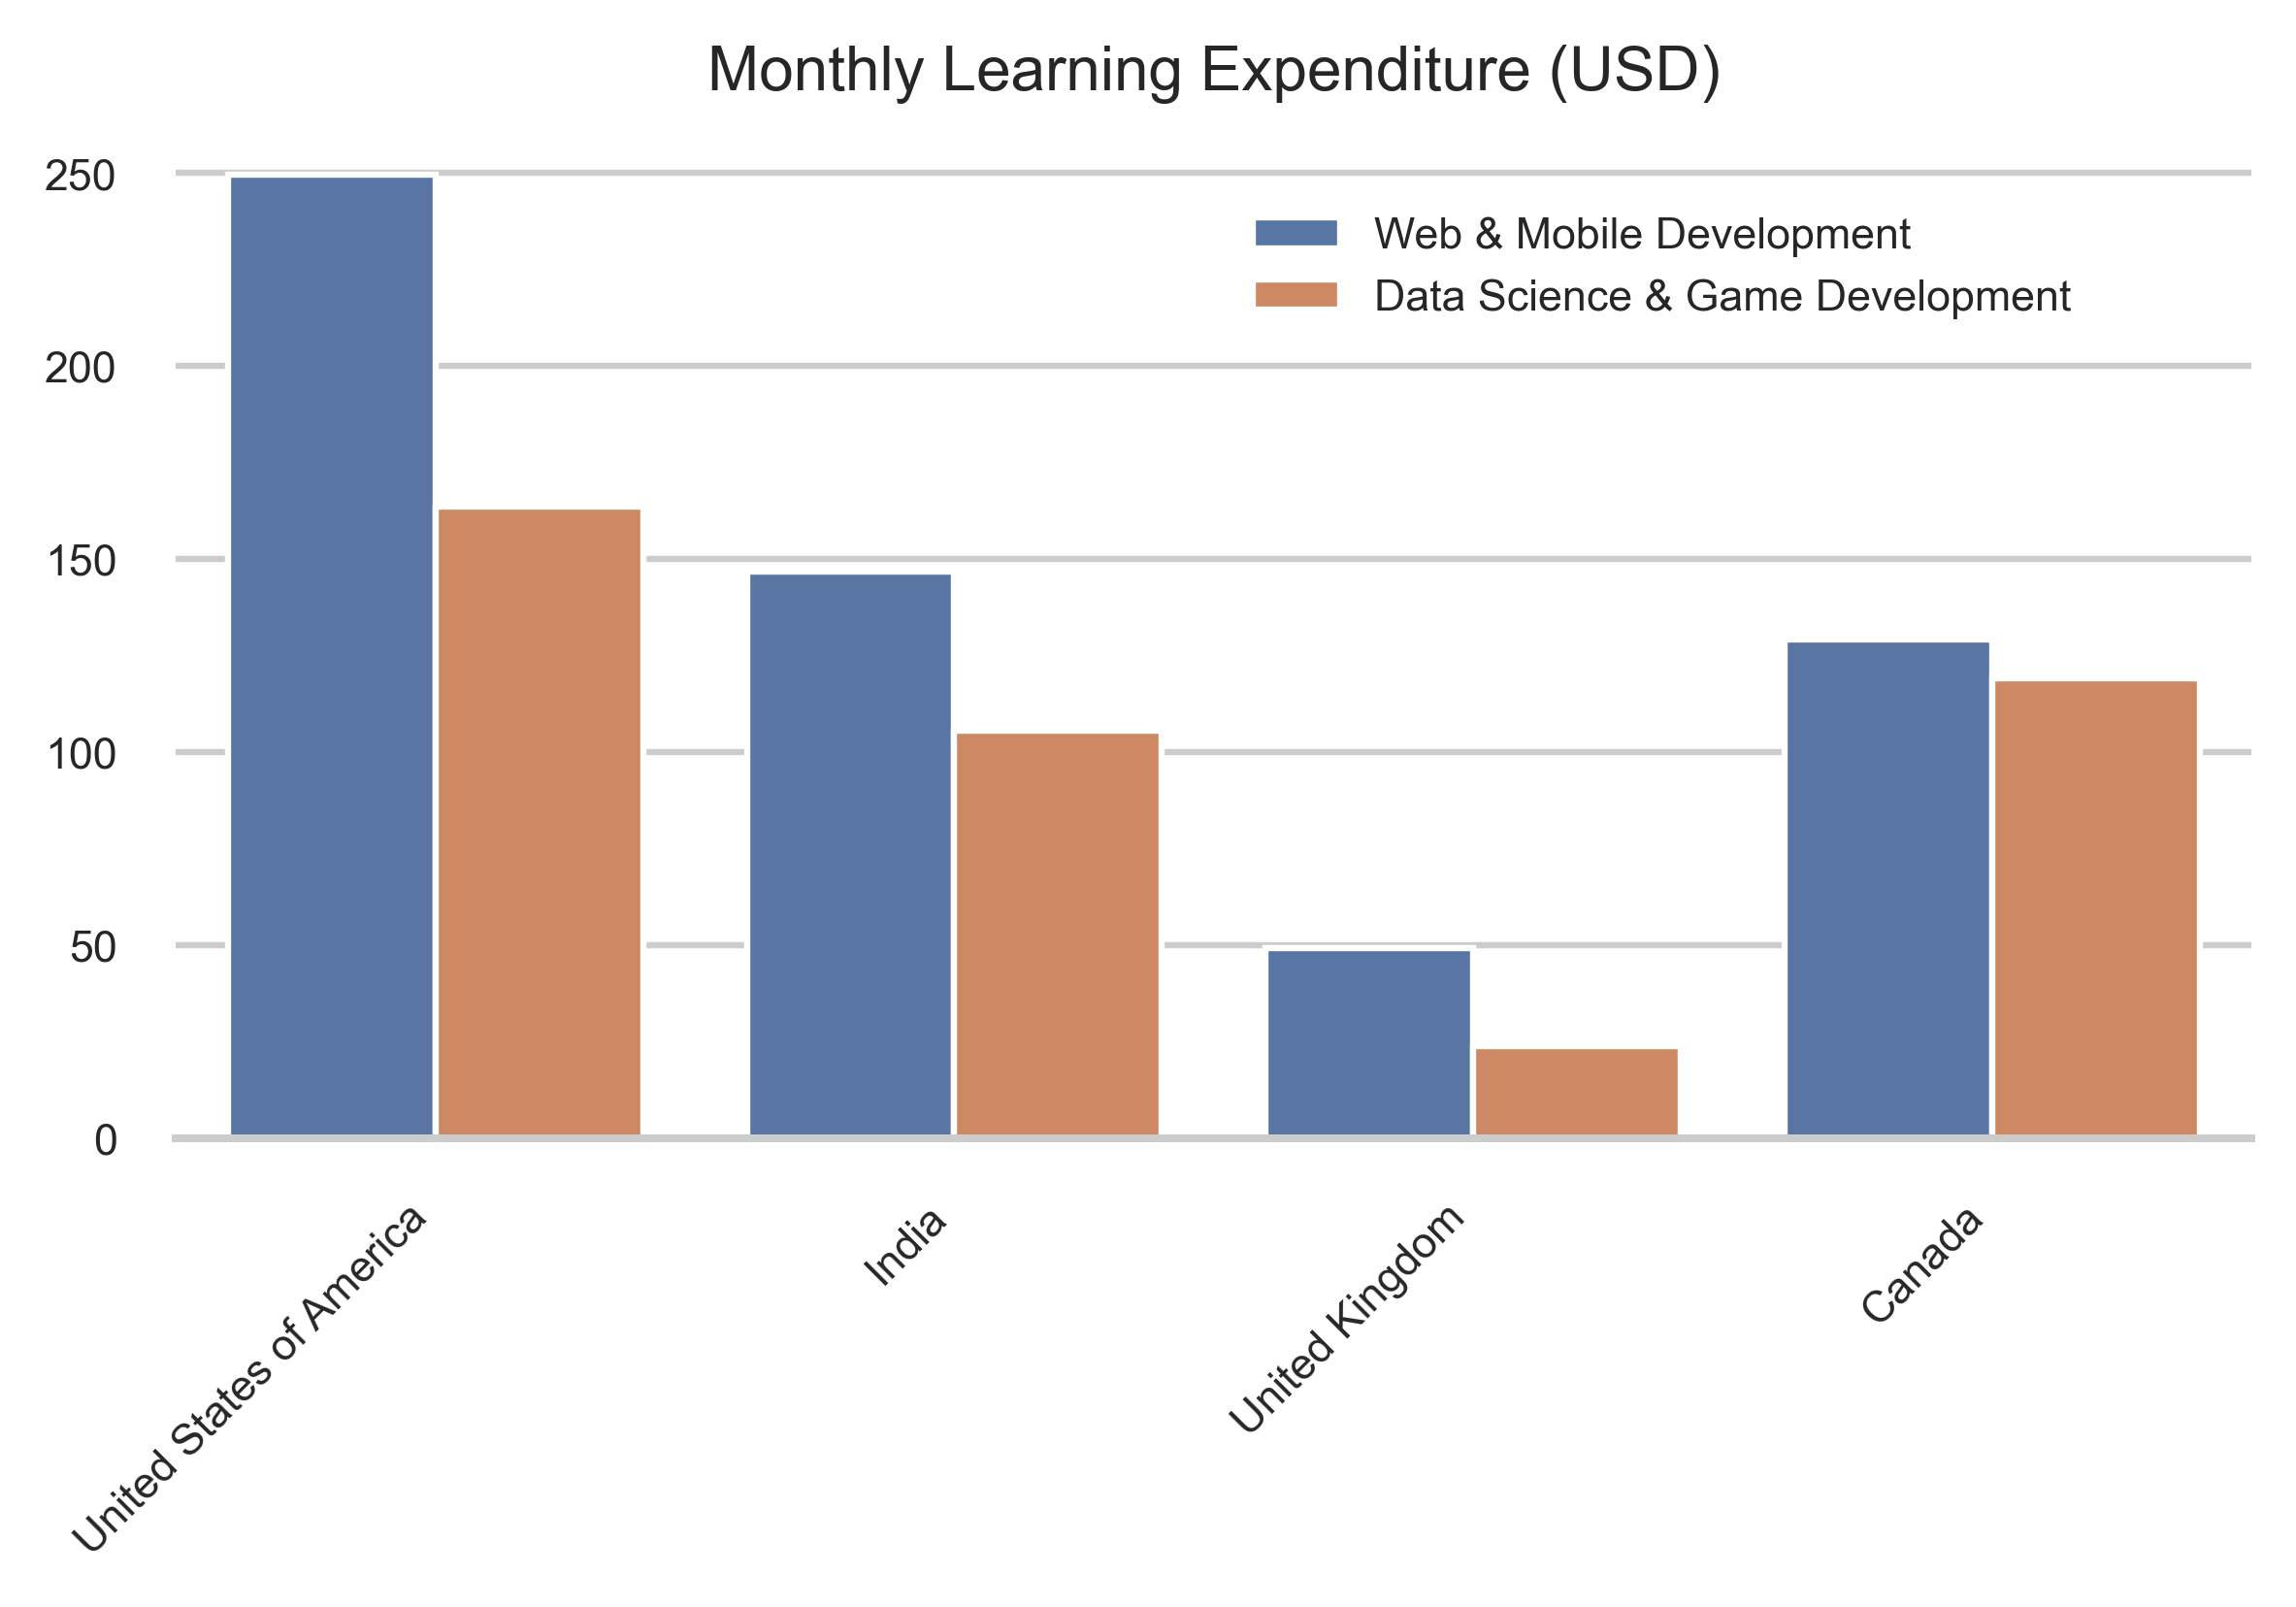

In [15]:
# Plot
fig, ax = plt.subplots(figsize=(6,3))
ax = sns.barplot(x='CountryLive',
                 y='value',
                 hue='variable',
                 data=monthly_spend)

# Plot Aesthetics
handles, labels = ax.get_legend_handles_labels()
labels_new = ['Web & Mobile Development', 'Data Science & Game Development']

ax.set_title('Monthly Learning Expenditure (USD)', fontsize=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(labelsize=7)
plt.xticks(rotation = 45, ha='right')
plt.legend(labels = labels_new,
           handles = handles,
           prop={'size': 7},
           fontsize=5,
           frameon=False,
           bbox_to_anchor=(0.5,0.95))
sns.despine(left=True)
sns.set(style='whitegrid')

### Observations
- At first glance, the US appears to be the highest.
- The Web & Mobile for the US looks to be exceptionally higher than the others so let's see if there are any extreme values causing this:

## Dealing With Outliers

In [16]:
# Create dataframes that just have our courtries of interest
survey_web_mobile_countries = survey_web_mobile_clean[(survey_web_mobile_clean['CountryLive'] == 'United States of America') |
                        (survey_web_mobile_clean['CountryLive'] == 'India') |
                        (survey_web_mobile_clean['CountryLive'] == 'United Kingdom') |
                        (survey_web_mobile_clean['CountryLive'] == 'Canada')]
survey_data_game_countries = survey_data_game_clean[(survey_data_game_clean['CountryLive'] == 'United States of America') |
                        (survey_data_game_clean['CountryLive'] == 'India') |
                        (survey_data_game_clean['CountryLive'] == 'United Kingdom') |
                        (survey_data_game_clean['CountryLive'] == 'Canada')]

<AxesSubplot:xlabel='CountryLive', ylabel='MoneyForLearning_monthly'>

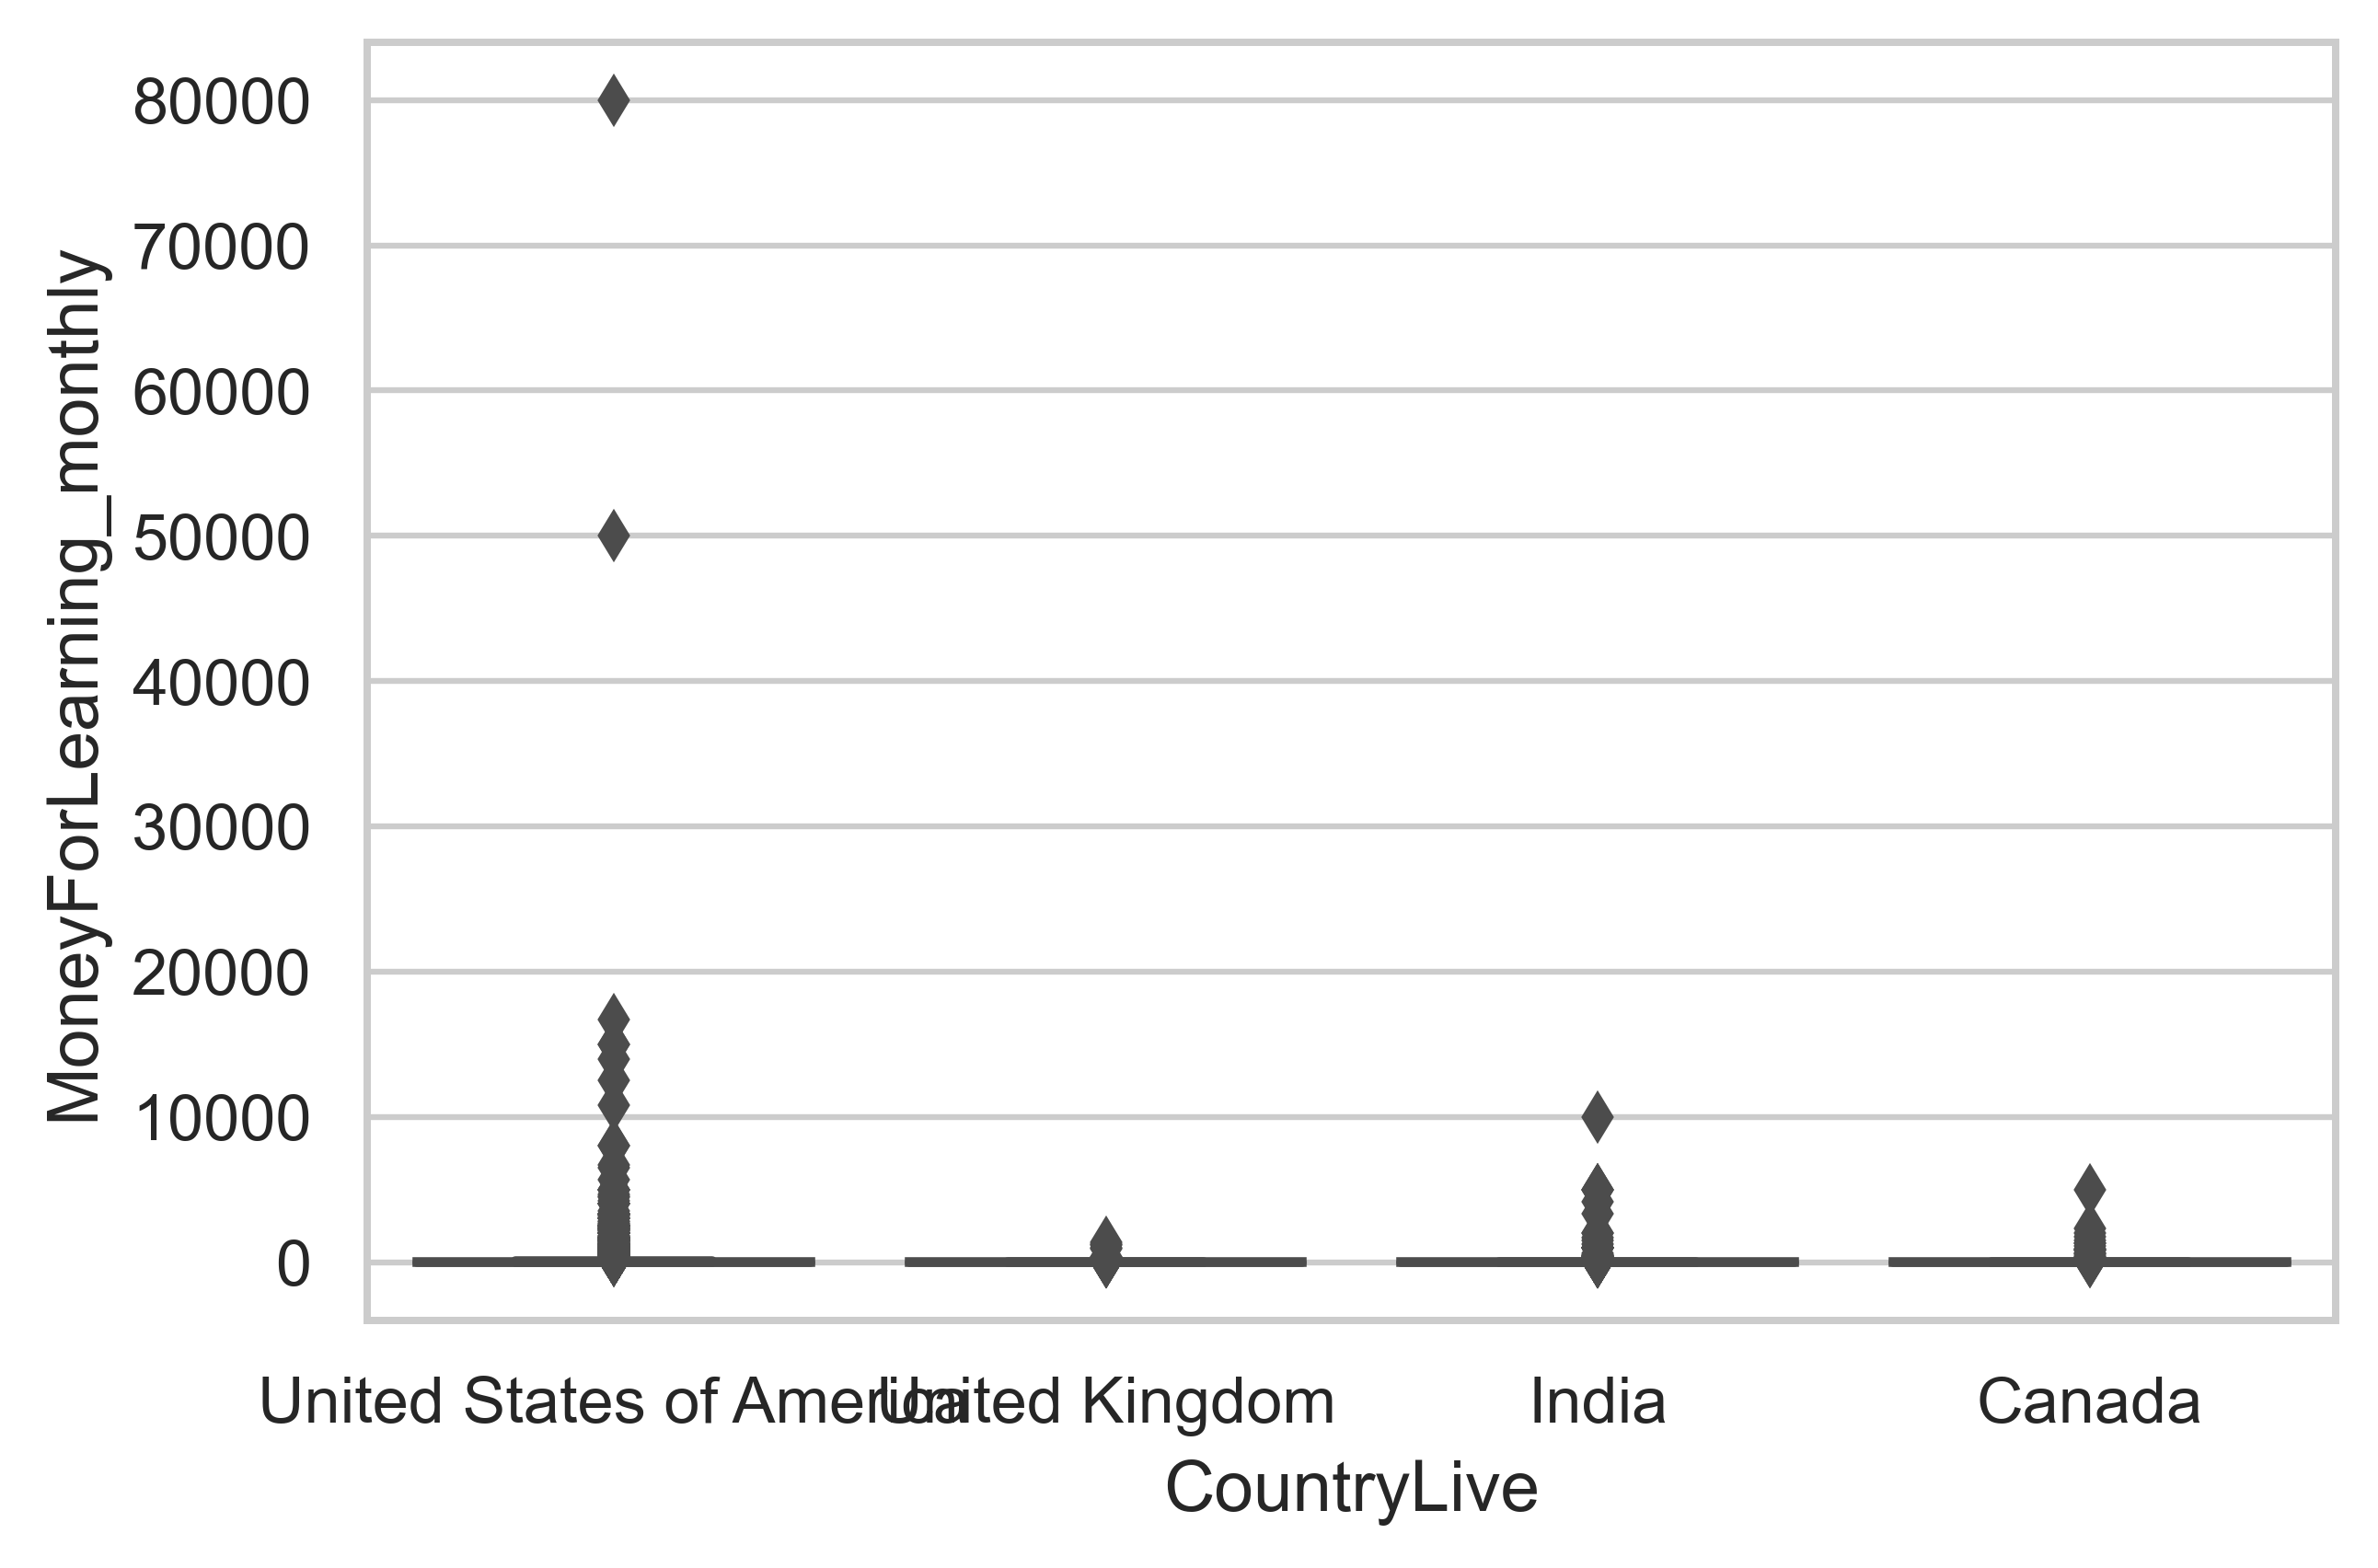

In [17]:
# Plot
sns.boxplot(data=survey_web_mobile_countries, x='CountryLive', y='MoneyForLearning_monthly')

<AxesSubplot:xlabel='CountryLive', ylabel='MoneyForLearning_monthly'>

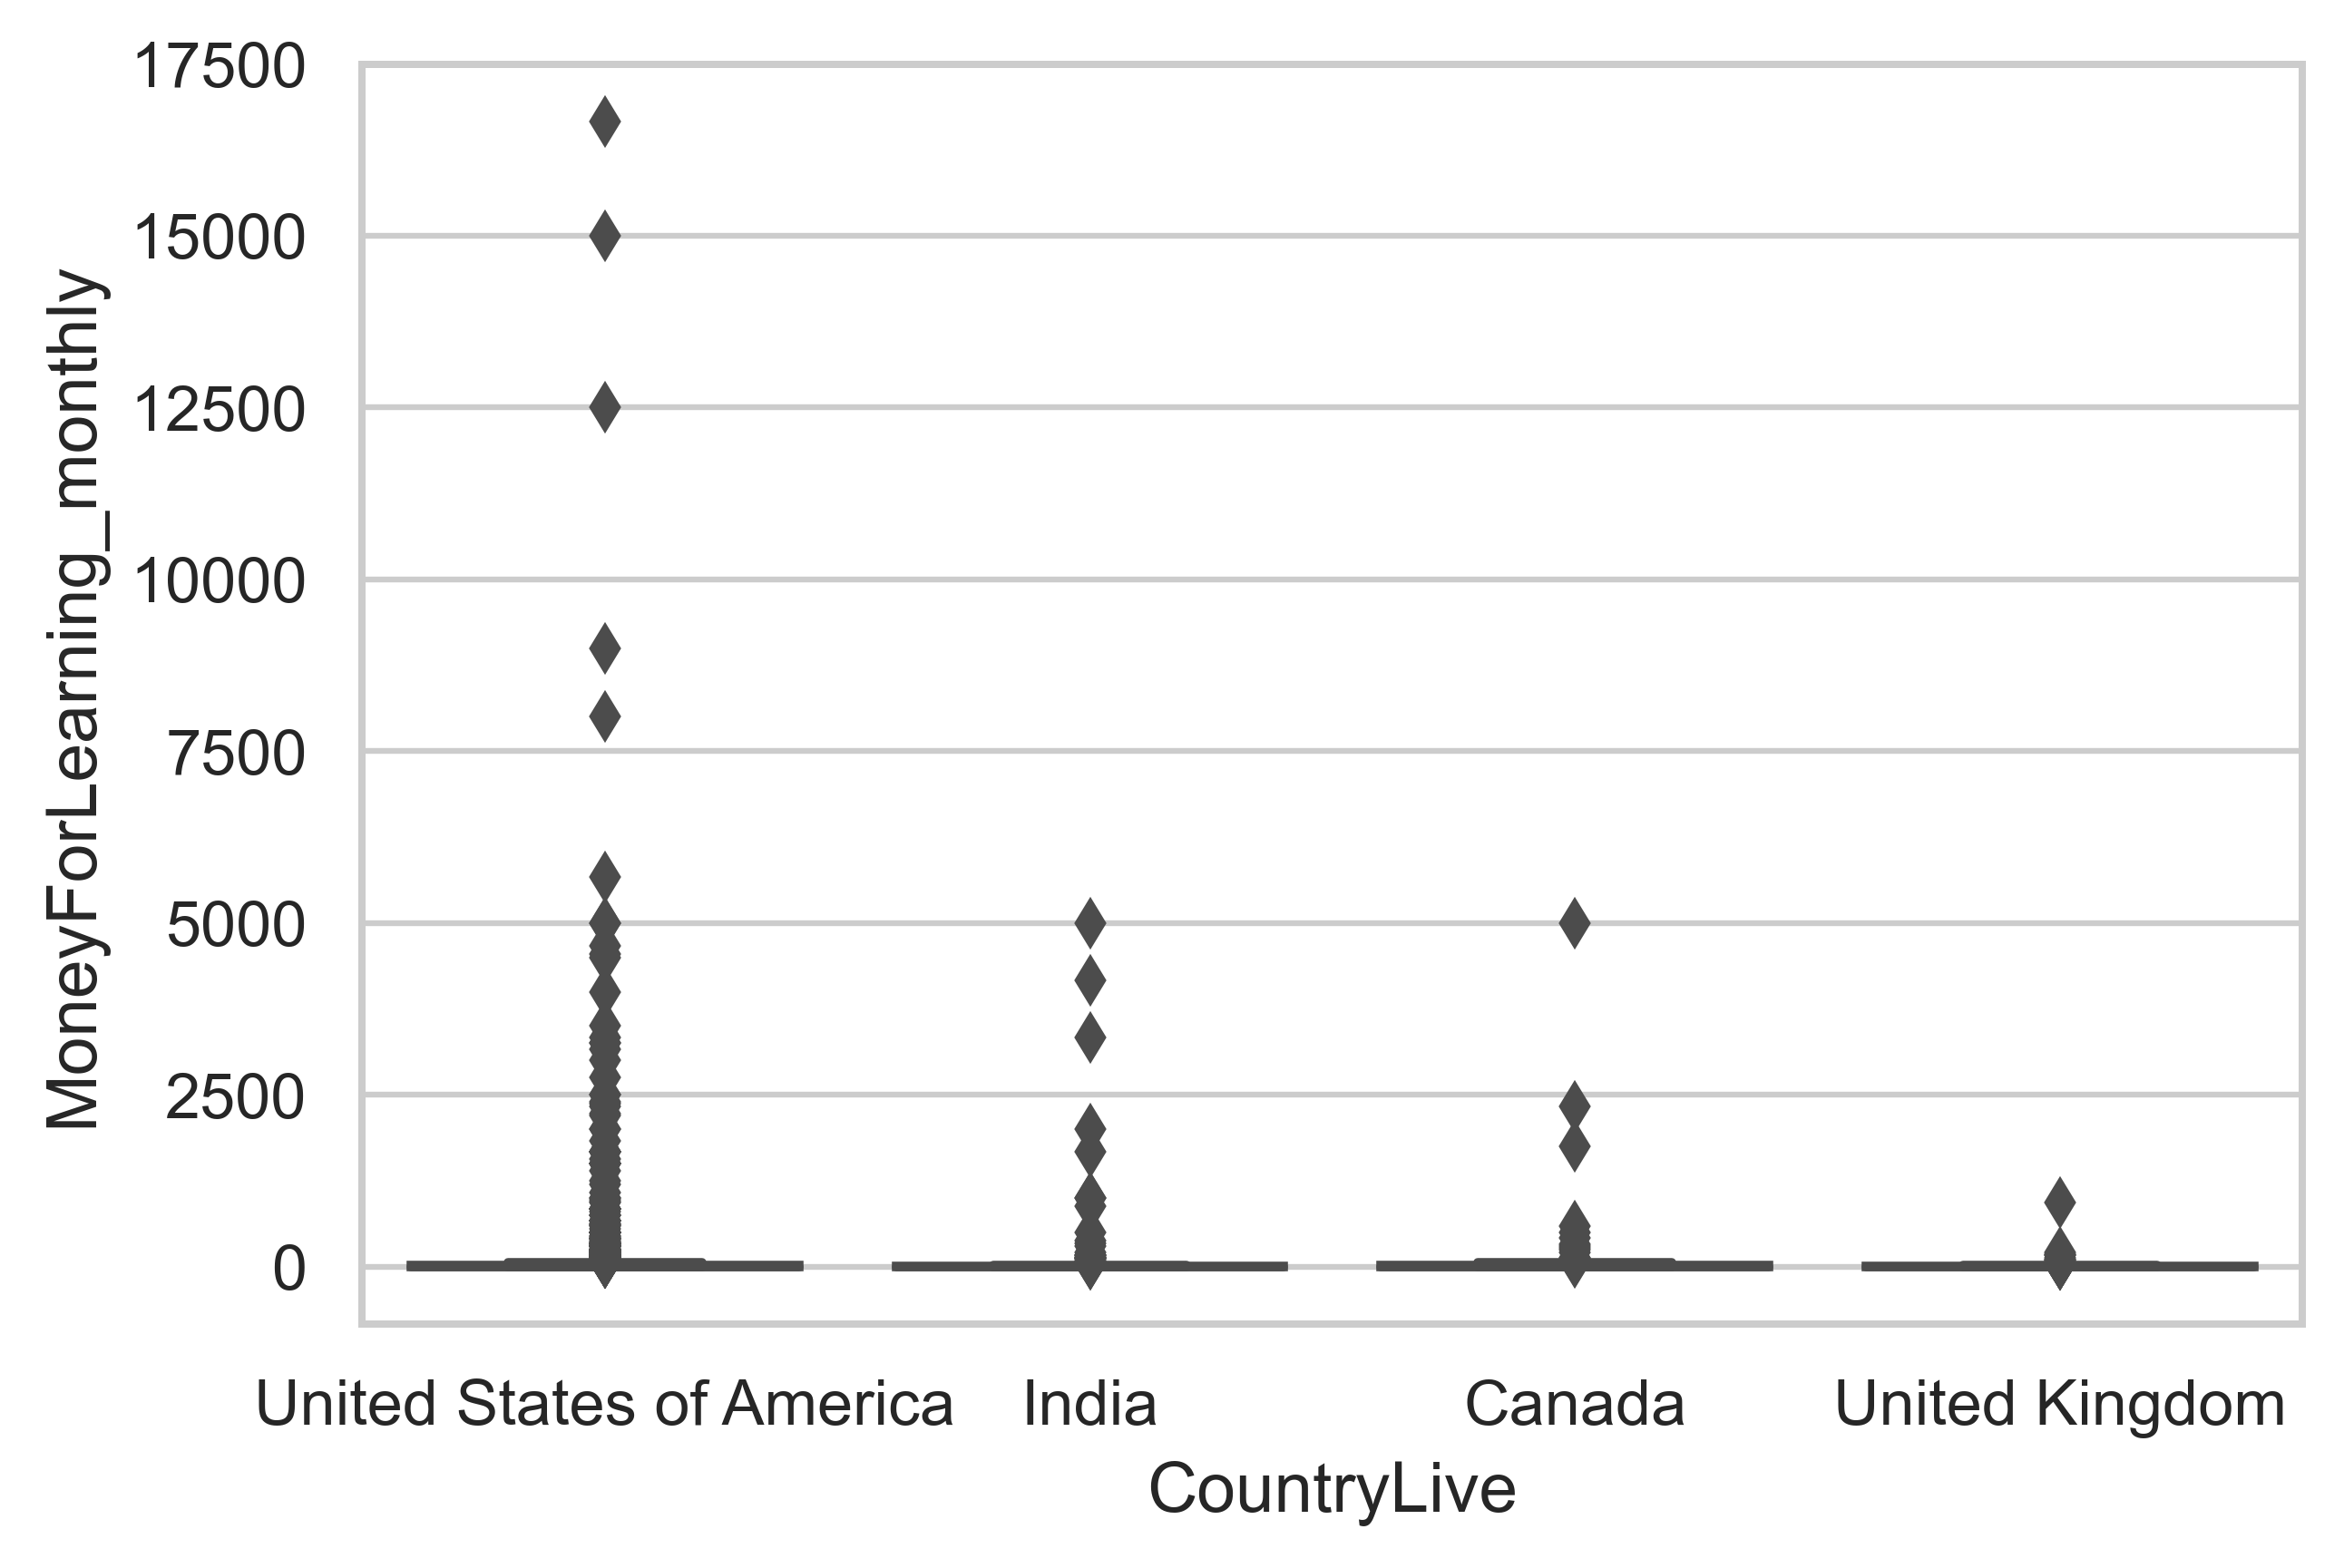

In [18]:
# Plot
sns.boxplot(data=survey_data_game_countries, x='CountryLive', y='MoneyForLearning_monthly') 

### Observations

Clearly we have many extreme ouliers include two for the US that are very extreme.  Let's use the ```describe.()``` method and tweak it to see the upper percentaile ranges:

In [19]:
survey_web_mobile_countries[survey_web_mobile_countries['CountryLive'] == 'United States of America']['MoneyForLearning_monthly'].describe(percentiles=[.25, .5, .75, .85, .95, .98])

count     2516.000000
mean       249.521510
std       2080.607888
min          0.000000
25%          0.000000
50%          4.170000
75%         50.000000
85%        166.670000
95%        979.165000
98%       2333.330000
max      80000.000000
Name: MoneyForLearning_monthly, dtype: float64

In [20]:
survey_web_mobile_countries[survey_web_mobile_countries['CountryLive'] == 'India']['MoneyForLearning_monthly'].describe(percentiles=[.25, .5, .75, .85, .95, .98])

count      393.000000
mean       146.663842
std        747.584003
min          0.000000
25%          0.000000
50%          0.000000
75%         12.500000
85%         60.500000
95%        500.000000
98%       1720.002800
max      10000.000000
Name: MoneyForLearning_monthly, dtype: float64

In [21]:
survey_web_mobile_countries[survey_web_mobile_countries['CountryLive'] == 'United Kingdom']['MoneyForLearning_monthly'].describe(percentiles=[.25, .5, .75, .85, .95, .98])

count     247.000000
mean       49.117287
std       171.432998
min         0.000000
25%         0.000000
50%         0.250000
75%        22.915000
85%        60.000000
95%       200.000000
98%       403.508800
max      1400.000000
Name: MoneyForLearning_monthly, dtype: float64

In [22]:
survey_web_mobile_countries[survey_web_mobile_countries['CountryLive'] == 'Canada']['MoneyForLearning_monthly'].describe(percentiles=[.25, .5, .75, .85, .95, .98])

count     203.000000
mean      129.170936
std       476.672180
min         0.000000
25%         0.000000
50%         0.830000
75%        25.000000
85%        83.330000
95%       857.276000
98%      1493.333200
max      5000.000000
Name: MoneyForLearning_monthly, dtype: float64

### Observations

There are many oulliers and it's hard to know why the responants entered that value.  Some possibilities are:

- The number is incorrect
- They included college tutition in that number
- They entered the total cost (instead of the monthly cost) of a bootcamp/course/college they attended.
- It's an amout that they would be willing to pay not that they have actually paid.
- They included some other source of funding (scholorship/finacial aid/compnay is paying, etc.)
- They actually are paying that much per month and the number is correct

Remember we are using a survey that wasn't specifically designed for our intended purpose.  Since we simply want to know which countries tend to invest more in their learning and since our courses only cost \\$59 per month, it isn't critical that we know if someone is paying or would be willing to pay \\$200, \\$800, or \\$2500 per month for a course.  For our analysis here, it is sufficient to know that they are willing to spend something more than what our courses cost.  

To represent this,  we could change any value over a certain threshold to some other (lower) amount that is closer to the rest of the values.  How can we achieve this while still representing that value as outlier but not letting it skew our analysis so much?

If we look at the percentaile tables above we can see a big jump from the 85th percentile to the 95th percentile.  If we impute any value that is in the 95th or higher to a value equal to the 85th percentile, the imputed values will still be represented as reletively "high" values which would indicate that residents are willing to spend alot of money on their learning.

In [23]:
# Update the dataframe so it only includes the information we need
survey_web_mobile_countries = survey_web_mobile_countries.loc[:, ['CountryLive', 'MoneyForLearning_monthly']]
survey_data_game_countries = survey_data_game_countries.loc[:, ['CountryLive', 'MoneyForLearning_monthly']]

survey_web_mobile_countries

,CountryLive,MoneyForLearning_monthly
1,United States of America,13.33
2,United States of America,200.00
6,United Kingdom,0.00
15,United States of America,0.00
16,United States of America,16.67
...,...,...
18107,India,275.00
18111,India,200.00
18113,United States of America,0.00
18130,United States of America,0.00


In [24]:
# Create function that will impute values that are over the 95th percentile with a value equal to the 95th percentile

def imputer(df):
    countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
    for country in countries:
        value = df[df['CountryLive'] == country]['MoneyForLearning_monthly'].quantile(.95) #The 95th percentile value
        mask = (df['CountryLive'] == country) & (df['MoneyForLearning_monthly'] > value)
        df['MoneyForLearning_monthly'] = df['MoneyForLearning_monthly'].mask(mask, value)
    return df

# Execute fuction on both dataframes
imputer(survey_web_mobile_countries)
imputer(survey_data_game_countries)

,CountryLive,MoneyForLearning_monthly
19,United States of America,17.86
32,United States of America,100.00
35,United States of America,0.00
40,United States of America,25.00
52,India,0.00
...,...,...
18049,United States of America,0.00
18050,United States of America,16.67
18111,India,200.00
18113,United States of America,0.00


As we can see below, the highest values in the ```MoneyForLearning_monthly``` column are equal to the 95th percentile value for that country:

In [25]:
survey_web_mobile_countries[survey_web_mobile_countries['CountryLive'] == 'United States of America']['MoneyForLearning_monthly'].sort_values(ascending=False)

7612     979.165
9801     979.165
13587    979.165
13517    979.165
3013     979.165
          ...   
9875       0.000
9857       0.000
9823       0.000
3793       0.000
18130      0.000
Name: MoneyForLearning_monthly, Length: 2516, dtype: float64

In [26]:
survey_data_game_countries[survey_data_game_countries['CountryLive'] == 'United States of America']['MoneyForLearning_monthly'].sort_values(ascending=False)

4944     597.9
4365     597.9
4824     597.9
4831     597.9
4832     597.9
         ...  
6750       0.0
6760       0.0
6782       0.0
6847       0.0
18130      0.0
Name: MoneyForLearning_monthly, Length: 1348, dtype: float64

In [27]:
# Group and calculate mean expenditure per country
web_mobile_gb2 = survey_web_mobile_countries.groupby(by='CountryLive').mean()
data_game_gb2 = survey_data_game_countries.groupby(by='CountryLive').mean()

# Merge into one dataframe
monthly_spend2 = web_mobile_gb2.merge(data_game_gb2, how='inner', on='CountryLive')
monthly_spend2 = monthly_spend2.rename(mapper={'MoneyForLearning_monthly_x':'web_mobile', 'MoneyForLearning_monthly_y':'data_game'}, axis=1)

# Further transform the data to for grouped bar plot
monthly_spend2 = monthly_spend2.reset_index()
monthly_spend2 = monthly_spend2.melt(id_vars=['CountryLive'])

monthly_spend2

,CountryLive,variable,value
0,Canada,web_mobile,81.982000
1,India,web_mobile,47.321170
2,United Kingdom,web_mobile,27.441377
3,United States of America,web_mobile,103.435688
4,Canada,data_game,43.849279
5,India,data_game,27.864498
6,United Kingdom,data_game,14.040410
7,United States of America,data_game,60.228316


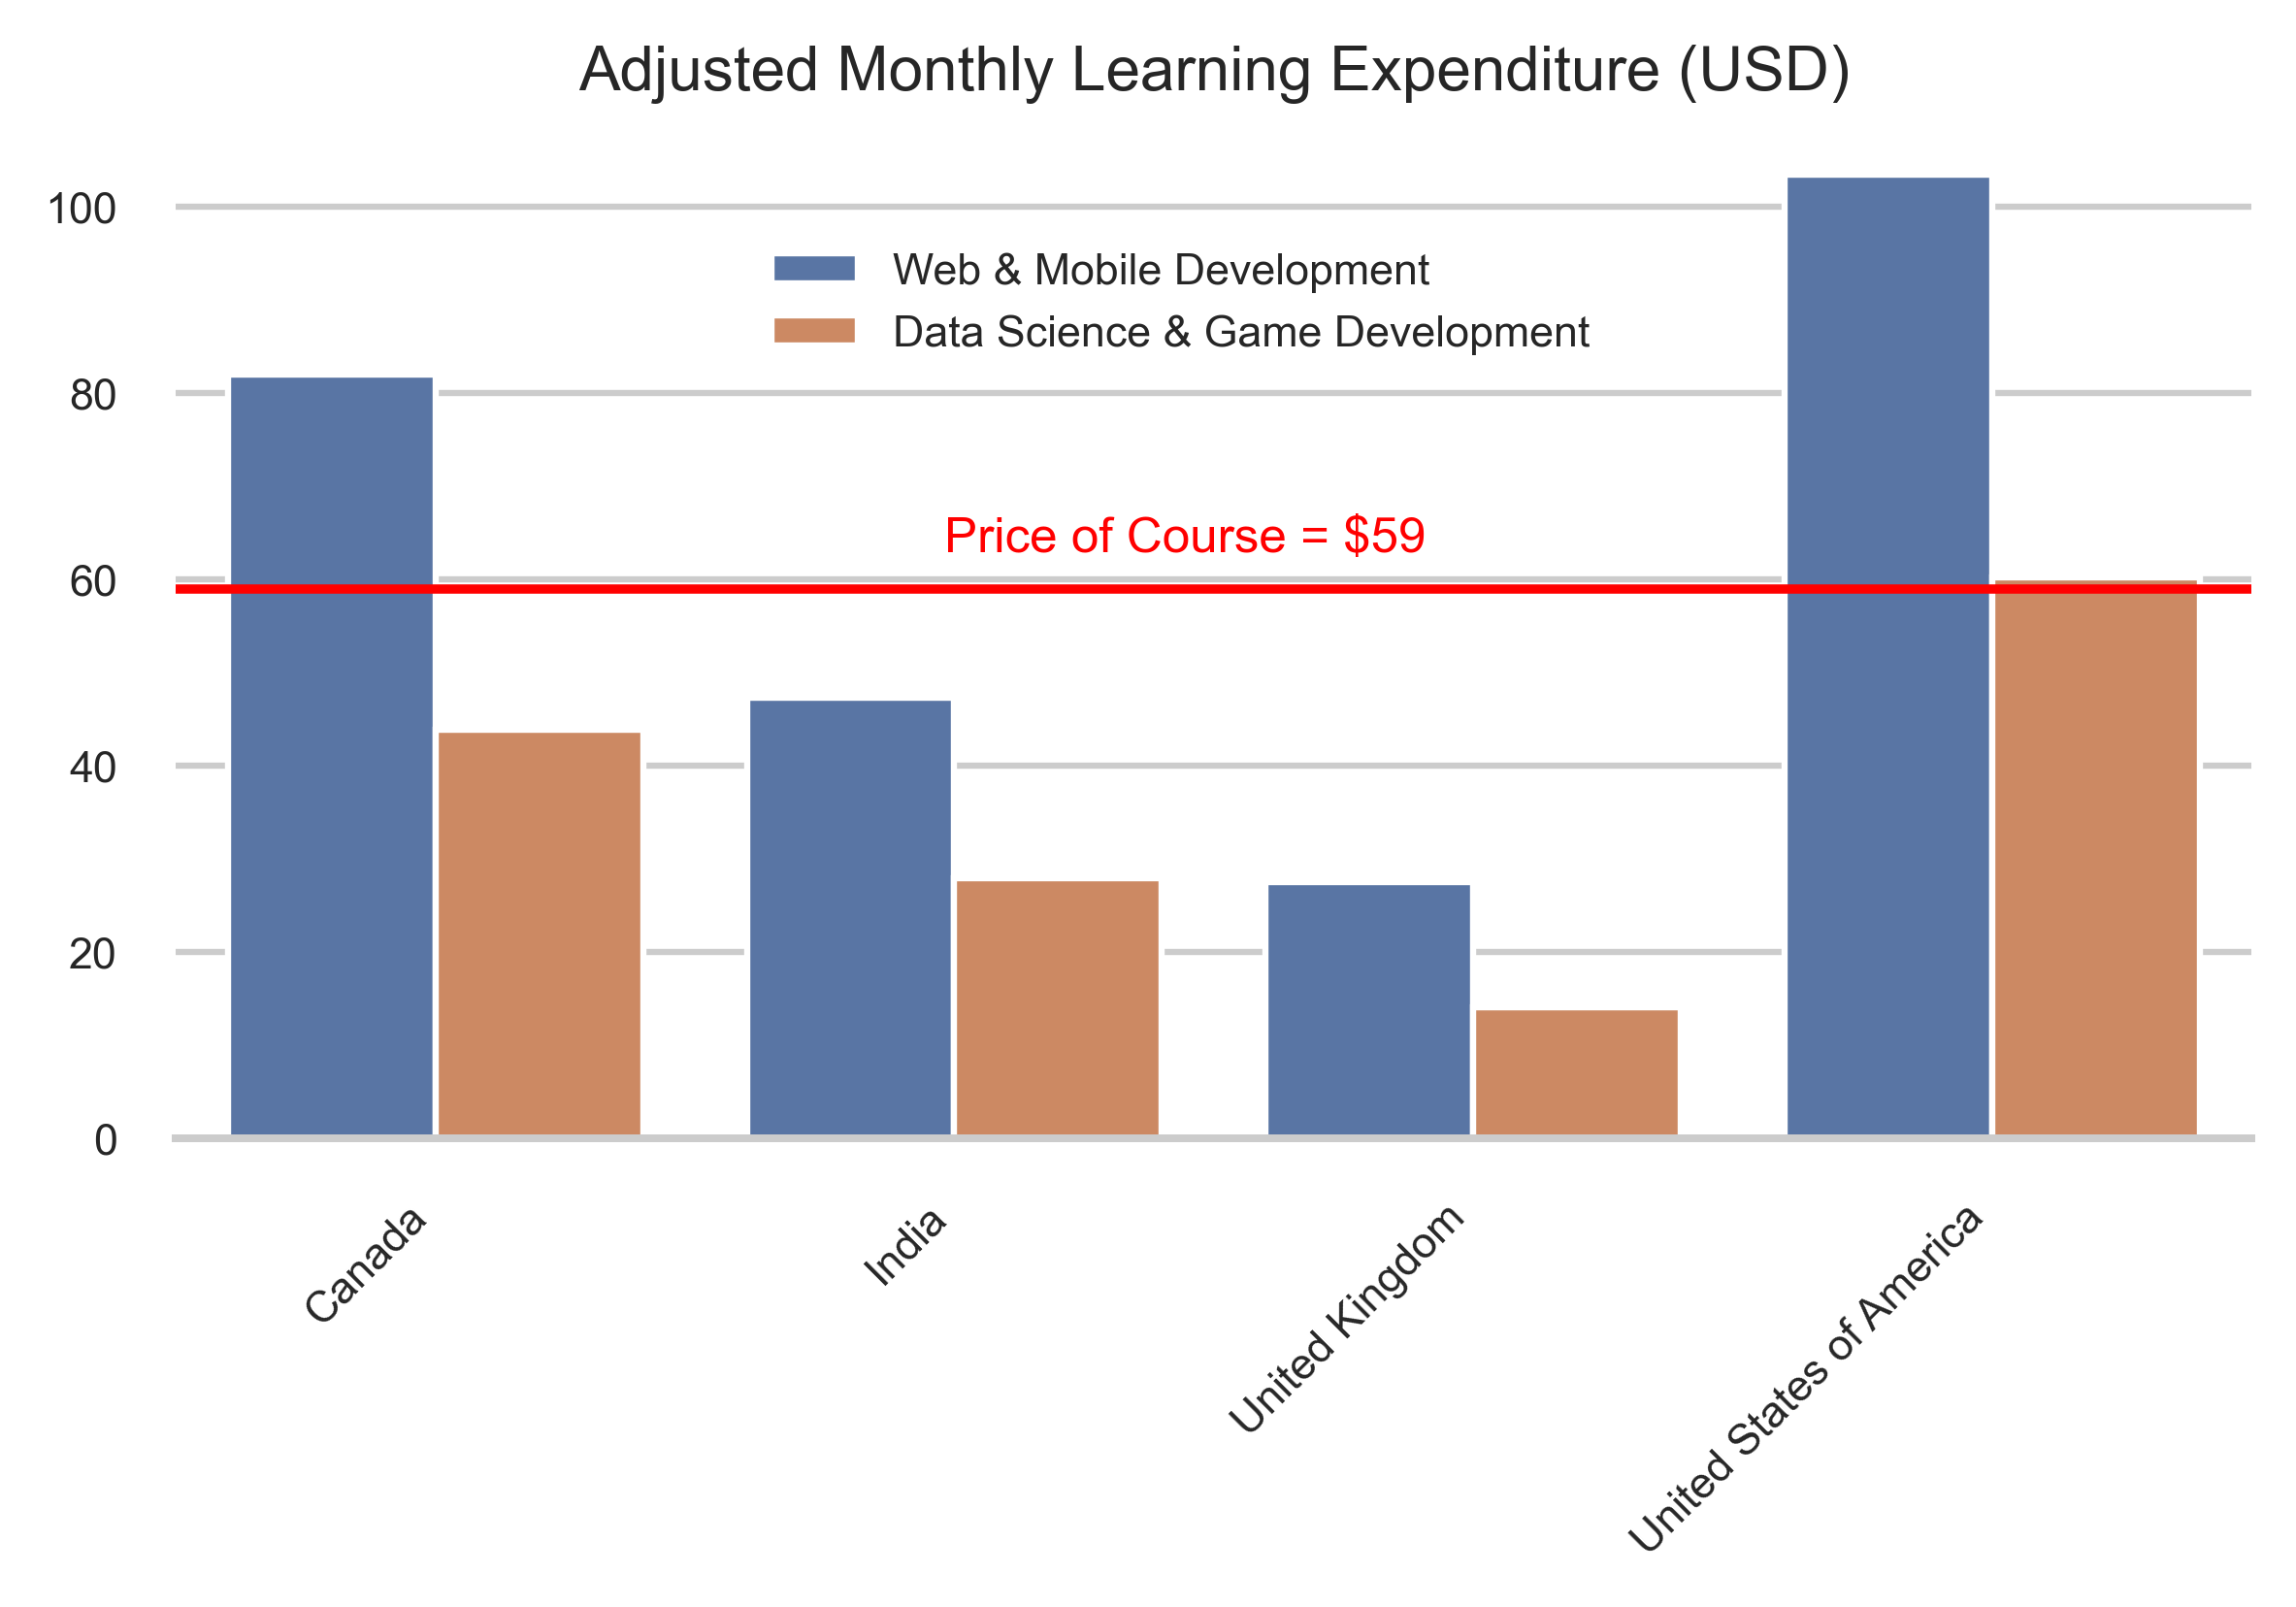

In [28]:
# Plot
fig, ax = plt.subplots(figsize=(6,3))
ax = sns.barplot(x='CountryLive',
                 y='value',
                 hue='variable',
                 data=monthly_spend2)

# Plot Aesthetics
handles, labels = ax.get_legend_handles_labels()
labels_new = ['Web & Mobile Development', 'Data Science & Game Development']
ax.set_title('Adjusted Monthly Learning Expenditure (USD)', fontsize=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(labelsize=7)
plt.axhline(59,
            color='red',
            ls='-')
plt.text(.98,
         63,
         "Price of Course = $59",
         color='red',
         fontsize=8)
plt.xticks(rotation = 45, ha='right')
plt.legend(labels = labels_new,
           handles = handles,
           prop={'size': 7},
           fontsize=5,
           frameon=False,
           bbox_to_anchor=(0.7,0.915))
sns.despine(left=True)
sns.set(style='whitegrid')

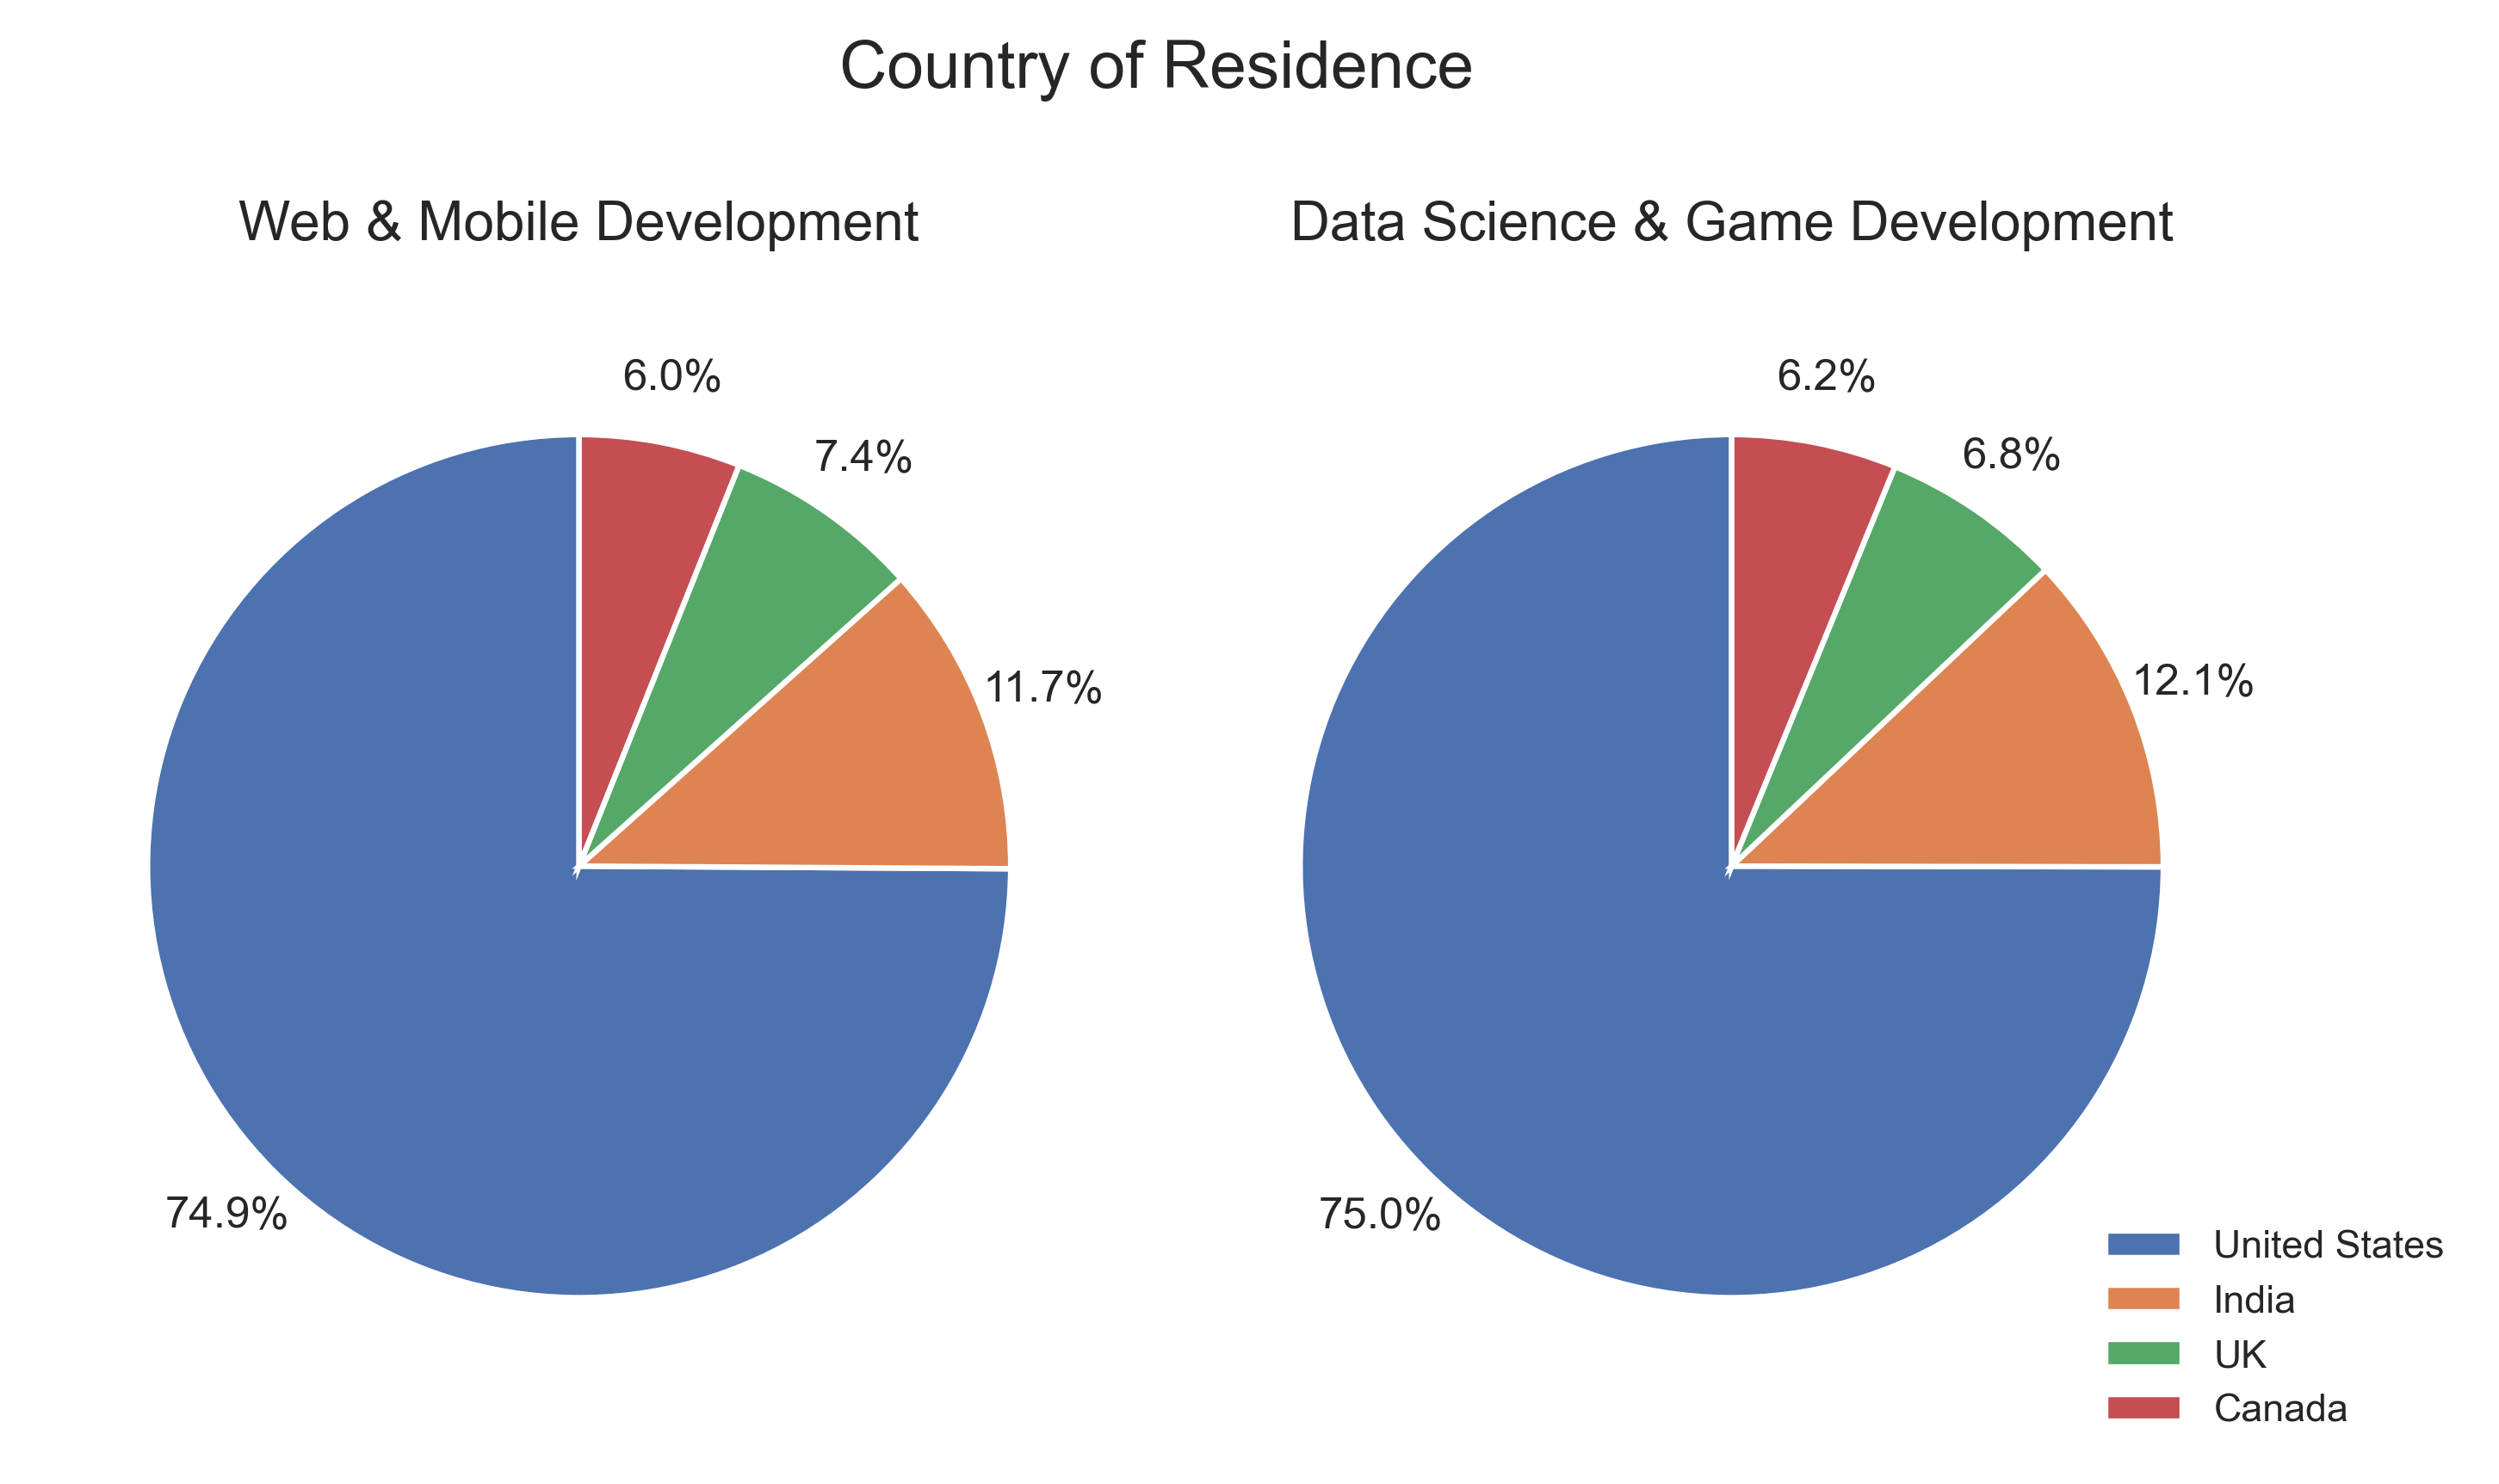

In [29]:
# Plot
fig, (ax1, ax2) = plt.subplots(1,2)

patches, texts, autotexts = ax1.pie(survey_web_mobile_countries['CountryLive'].value_counts(),
                                    startangle=90,
                                    autopct='%1.1f%%',
                                    textprops={'fontsize': 8},
                                    pctdistance=1.15)

patches, texts, autotexts = ax2.pie(survey_data_game_countries['CountryLive'].value_counts(),
                                    startangle=90,
                                    autopct='%1.1f%%',
                                    textprops={'fontsize': 8},
                                    pctdistance=1.15)

# Plot Aesthetics
ax1.set_title('Web & Mobile Development',
              y=1.05,
              fontsize=10)
ax2.set_title('Data Science & Game Development',
              y=1.05,
              fontsize=10)
fig.suptitle('Country of Residence', fontsize=12)
labels = ['United States', 'India', 'UK', 'Canada']
fig.legend(labels,
           loc='upper left',
           prop={'size': 7},
           frameon=False,
           bbox_to_anchor=(0.885,0.25))
plt.tight_layout()

### Observations

- After our adjustments, we can see that the United States spends the most in both web & mobile development courses as well as data science & game development courses.  Canada spends the next highest followed by India and the UK.

- People spend significantly more (50-100% more) on web and mobile courses when compared with data and game courses.

- Only the United States and Canada (web & mobile only for Canada) have monthly expenditures greater or equal to the price of our courses.

- 75% of the respondants live in the US, 12% live in India, 7% in the UK, and 6% in Canada.

## Alternative Approach

Another way to analyze this is to simply take the number of respondants who indicated that they have paid (or are paying) more than \\$59 as a percentage of the total.  This way the impact of the extreme values on the mean are greatly diminished.

In [30]:
web_mobile_pct = {}
data_game_pct = {}
country_list = ['United States of America', 'India', 'United Kingdom', 'Canada']

for c in country_list:
    mask = survey_web_mobile_countries[survey_web_mobile_countries['CountryLive'] == c]['MoneyForLearning_monthly'] >= 59
    count = mask.sum()
    length = len(survey_web_mobile_countries[survey_web_mobile_countries['CountryLive'] == c]['MoneyForLearning_monthly'] > 59)
    percent = count/length
    web_mobile_pct[c] = round((percent * 100),2)
                              
for c in country_list:
    mask = survey_data_game_countries[survey_data_game_countries['CountryLive'] == c]['MoneyForLearning_monthly'] >= 59
    count = mask.sum()
    length = len(survey_data_game_countries[survey_data_game_countries['CountryLive'] == c]['MoneyForLearning_monthly'] > 59)
    percent = count/length
    data_game_pct[c] = round((percent * 100),2)
                             
# Create dataframe from above dictionaries
percents = pd.DataFrame(data=[web_mobile_pct, data_game_pct]).T

# Transform the data to for grouped bar plot
percents = percents.reset_index()
percents = percents.melt(id_vars=['index'])
percents

,index,variable,value
0,United States of America,0,23.29
1,India,0,15.27
2,United Kingdom,0,16.19
3,Canada,0,17.73
4,United States of America,1,18.69
5,India,1,11.06
6,United Kingdom,1,9.02
7,Canada,1,18.02


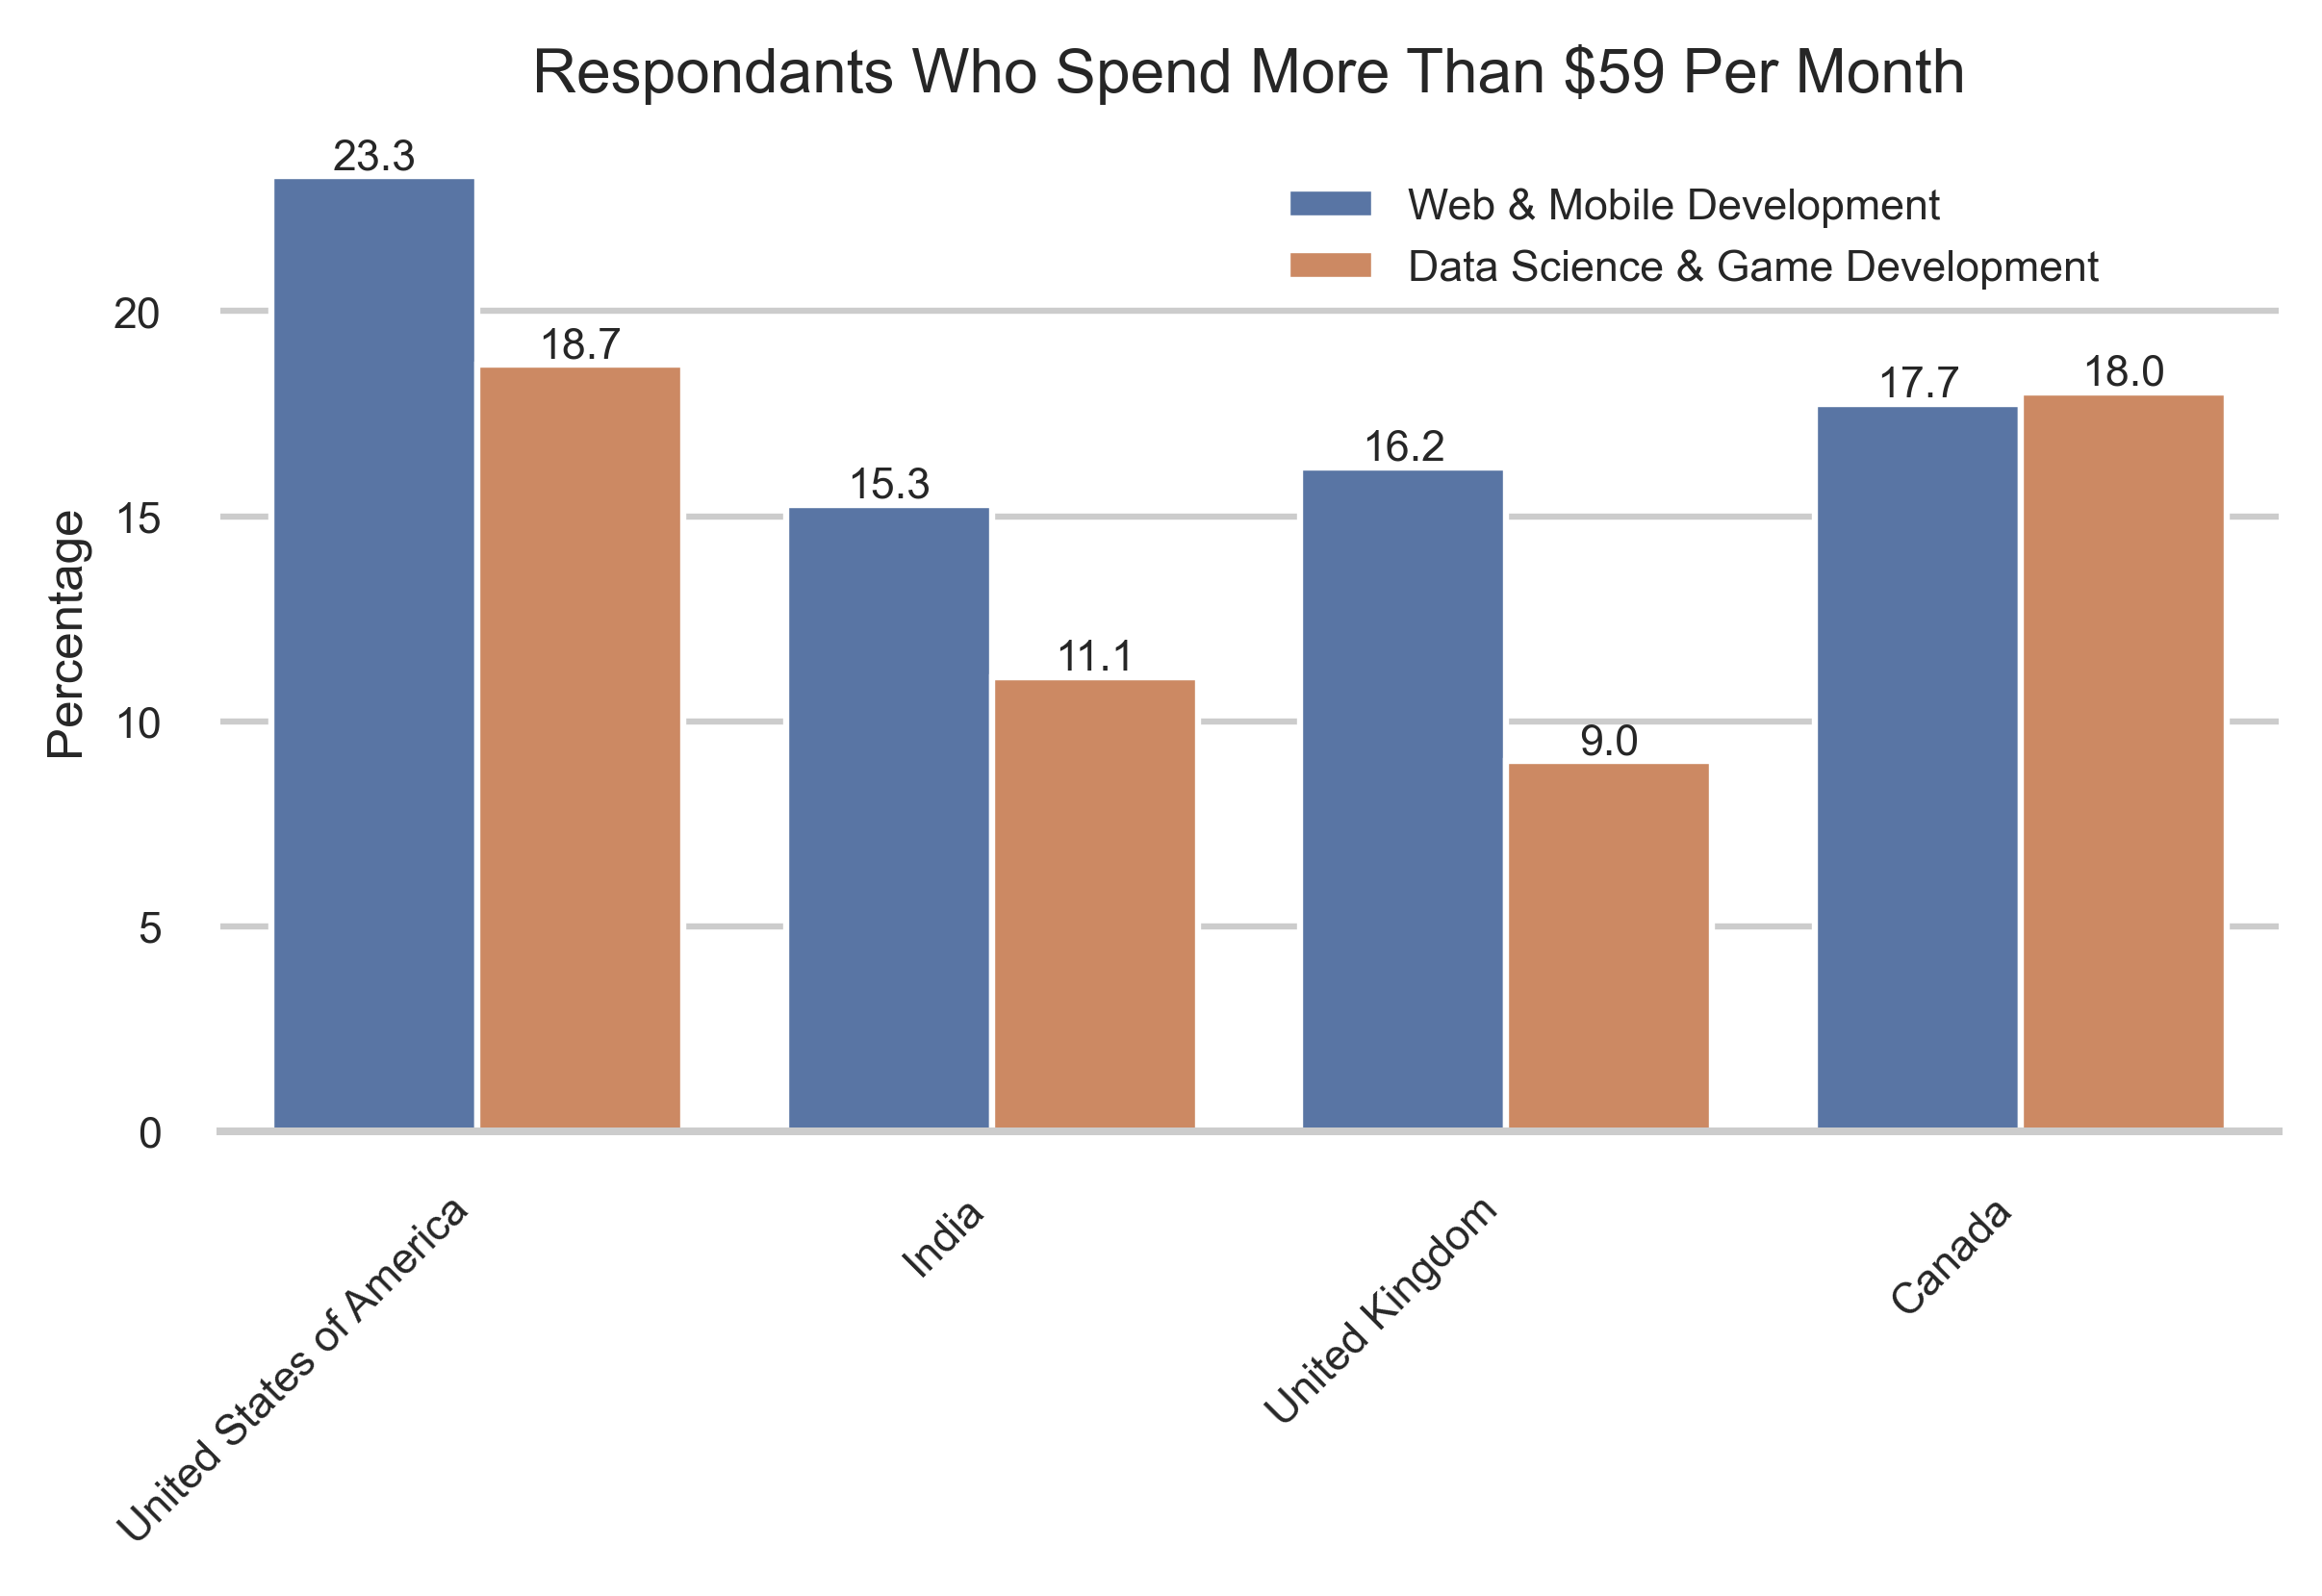

In [31]:
# Plot
fig, ax = plt.subplots(figsize=(6,3))
ax = sns.barplot(x='index',
                 y='value',
                 hue='variable',
                 data=percents)

# Plot Aesthetics
handles, labels = ax.get_legend_handles_labels()
labels_new = ['Web & Mobile Development', 'Data Science & Game Development']

ax.set_title('Respondants Who Spend More Than $59 Per Month', fontsize=10)
ax.set_ylabel('Percentage', fontsize=8)
ax.set_xlabel('')
ax.tick_params(labelsize=7)
plt.xticks(rotation = 45, ha='right')
plt.legend(labels = labels_new,
           handles = handles,
           prop={'size': 7},
           fontsize=5,
           frameon=False,
           bbox_to_anchor=(0.5,0.98))
sns.despine(left=True)
sns.set(style='whitegrid')

# Annotations above bars
for bar in ax.patches:     
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    ax.annotate(format(bar.get_height(), '.1f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=7, xytext=(0, 3), 
                   textcoords='offset points')

### Observations

- The United States leads the pack in this view as well with about 20% of respondants spending at least \\$59 per month on learning.
- Canada comes in second with 18%; the UK and India are roughly equal with about 12-13%

## Conclusions

- Based on our methodology, the United States should be the the main focus of the advertising campaign.

- We'd gained alot of knoweledge about our potential target markets.  If our company has a marketing department, we should ask them to investigate the other markets further.

- Our method of handling the outliers for the monthly spending values resulted in the mean values being reduced to below the \\$59 price per course level.  There are several ways we could have handled the extreme values.  Since we are using a survey that wasn't exactly intended for our purpose, we shouldn't let the mean values we have arrived at be disqualifying factors. Without further marketing research or more conclusive data, we can't firmly exclude investing the other courntries.

- Due to the potential size of the market in India the company may want to invest there even if it doesn't appear to meet the spending threshold.  It may also want to consider lowering the price of its courses in India if deemed appropriate.

- If company does decide to invest in multiple countries, it should consider splitting its advertising budget according to the above country of residence percentages.

- The company should also consider targeting the web & mobile development market and the data science & game development markets seperately since the money people allocate to learning vary significantly between them.

- Although the survey doesn't provide conclusive answers, it does give the compnay strong guidance for researching further.

## Methodololgy Summary

For this project we took the role of a data analyst for an e-learning compnay that offers courses in both web & mobile development as well as data science & game development.  The company wants to invest in advertising and wants to know where to best deploy its resources.  Instead of paying for its own study, the company chose to use an existing survey to gain insight into its target market.

To answer these questions we used:
- Descriptive statistics including percentiles, boxplots, and mean analysis
- Imputation of ouliers
- Data cleaning & vectorized operations with Pandas
- Data visualiztion using the Matplotlib & Seaborn libraries with custom aesthetics